https://www.kaggle.com/code/satyajeetrai/credit-card-fraud-detection/input

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (
accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
)
from sklearn.ensemble import (
AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
)
from sklearn.linear_model import (
LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, RidgeClassifierCV, SGDClassifier
)
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler

In [9]:
df = pd.read_csv("creditcard.csv")
df.head()

Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]

In [11]:
df["Time"].describe()

count   284807.00
mean     94813.86
std      47488.15
min          0.00
25%      54201.50
50%      84692.00
75%     139320.50
max     172792.00
Name: Time, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
import plotly.express as px

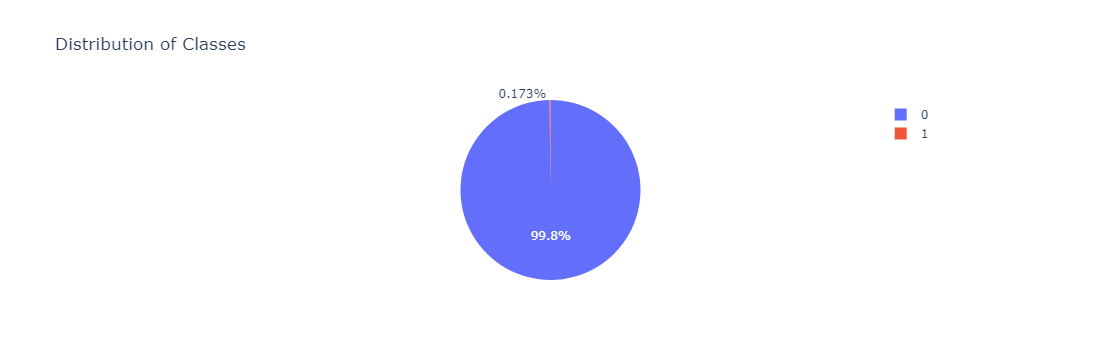

In [19]:
fig = px.pie(data_frame = df, names = "Class", title = "Distribution of Classes")
fig.show()

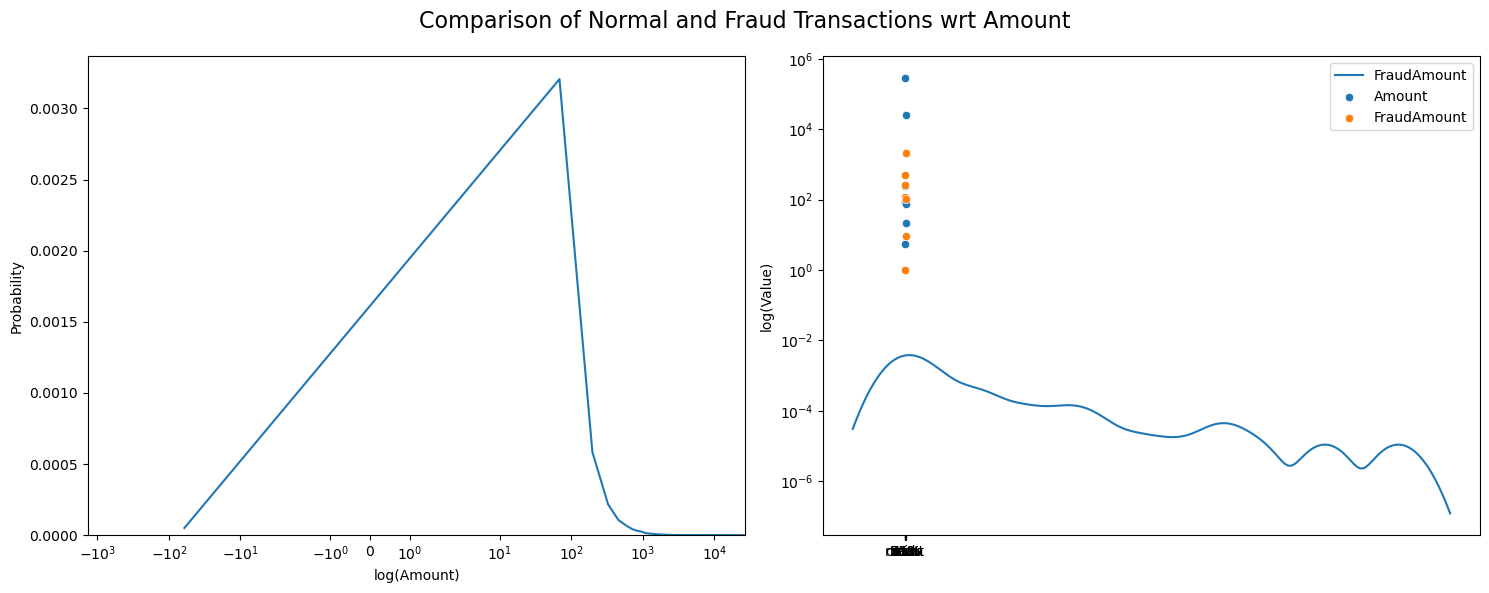

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.suptitle("Comparison of Normal and Fraud Transactions wrt Amount", fontsize = 16)


sns.kdeplot(df[df["Class"] == 0]["Amount"], label = "Amount", ax = ax[0])
sns.kdeplot(df[df["Class"] == 1]["Amount"], label = "FraudAmount", ax = ax[1])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)')
ax[0].set_ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(df[df['Class'] == 0]['Amount'].describe(), label='Amount',ax = ax[1])
sns.scatterplot(df[df['Class'] == 1]['Amount'].describe(), label='FraudAmount',ax = ax[1])
ax[1].set_yscale('log')
ax[1].set_xlabel('')
ax[1].set_ylabel('log(Value)')
plt.tight_layout()
plt.show()

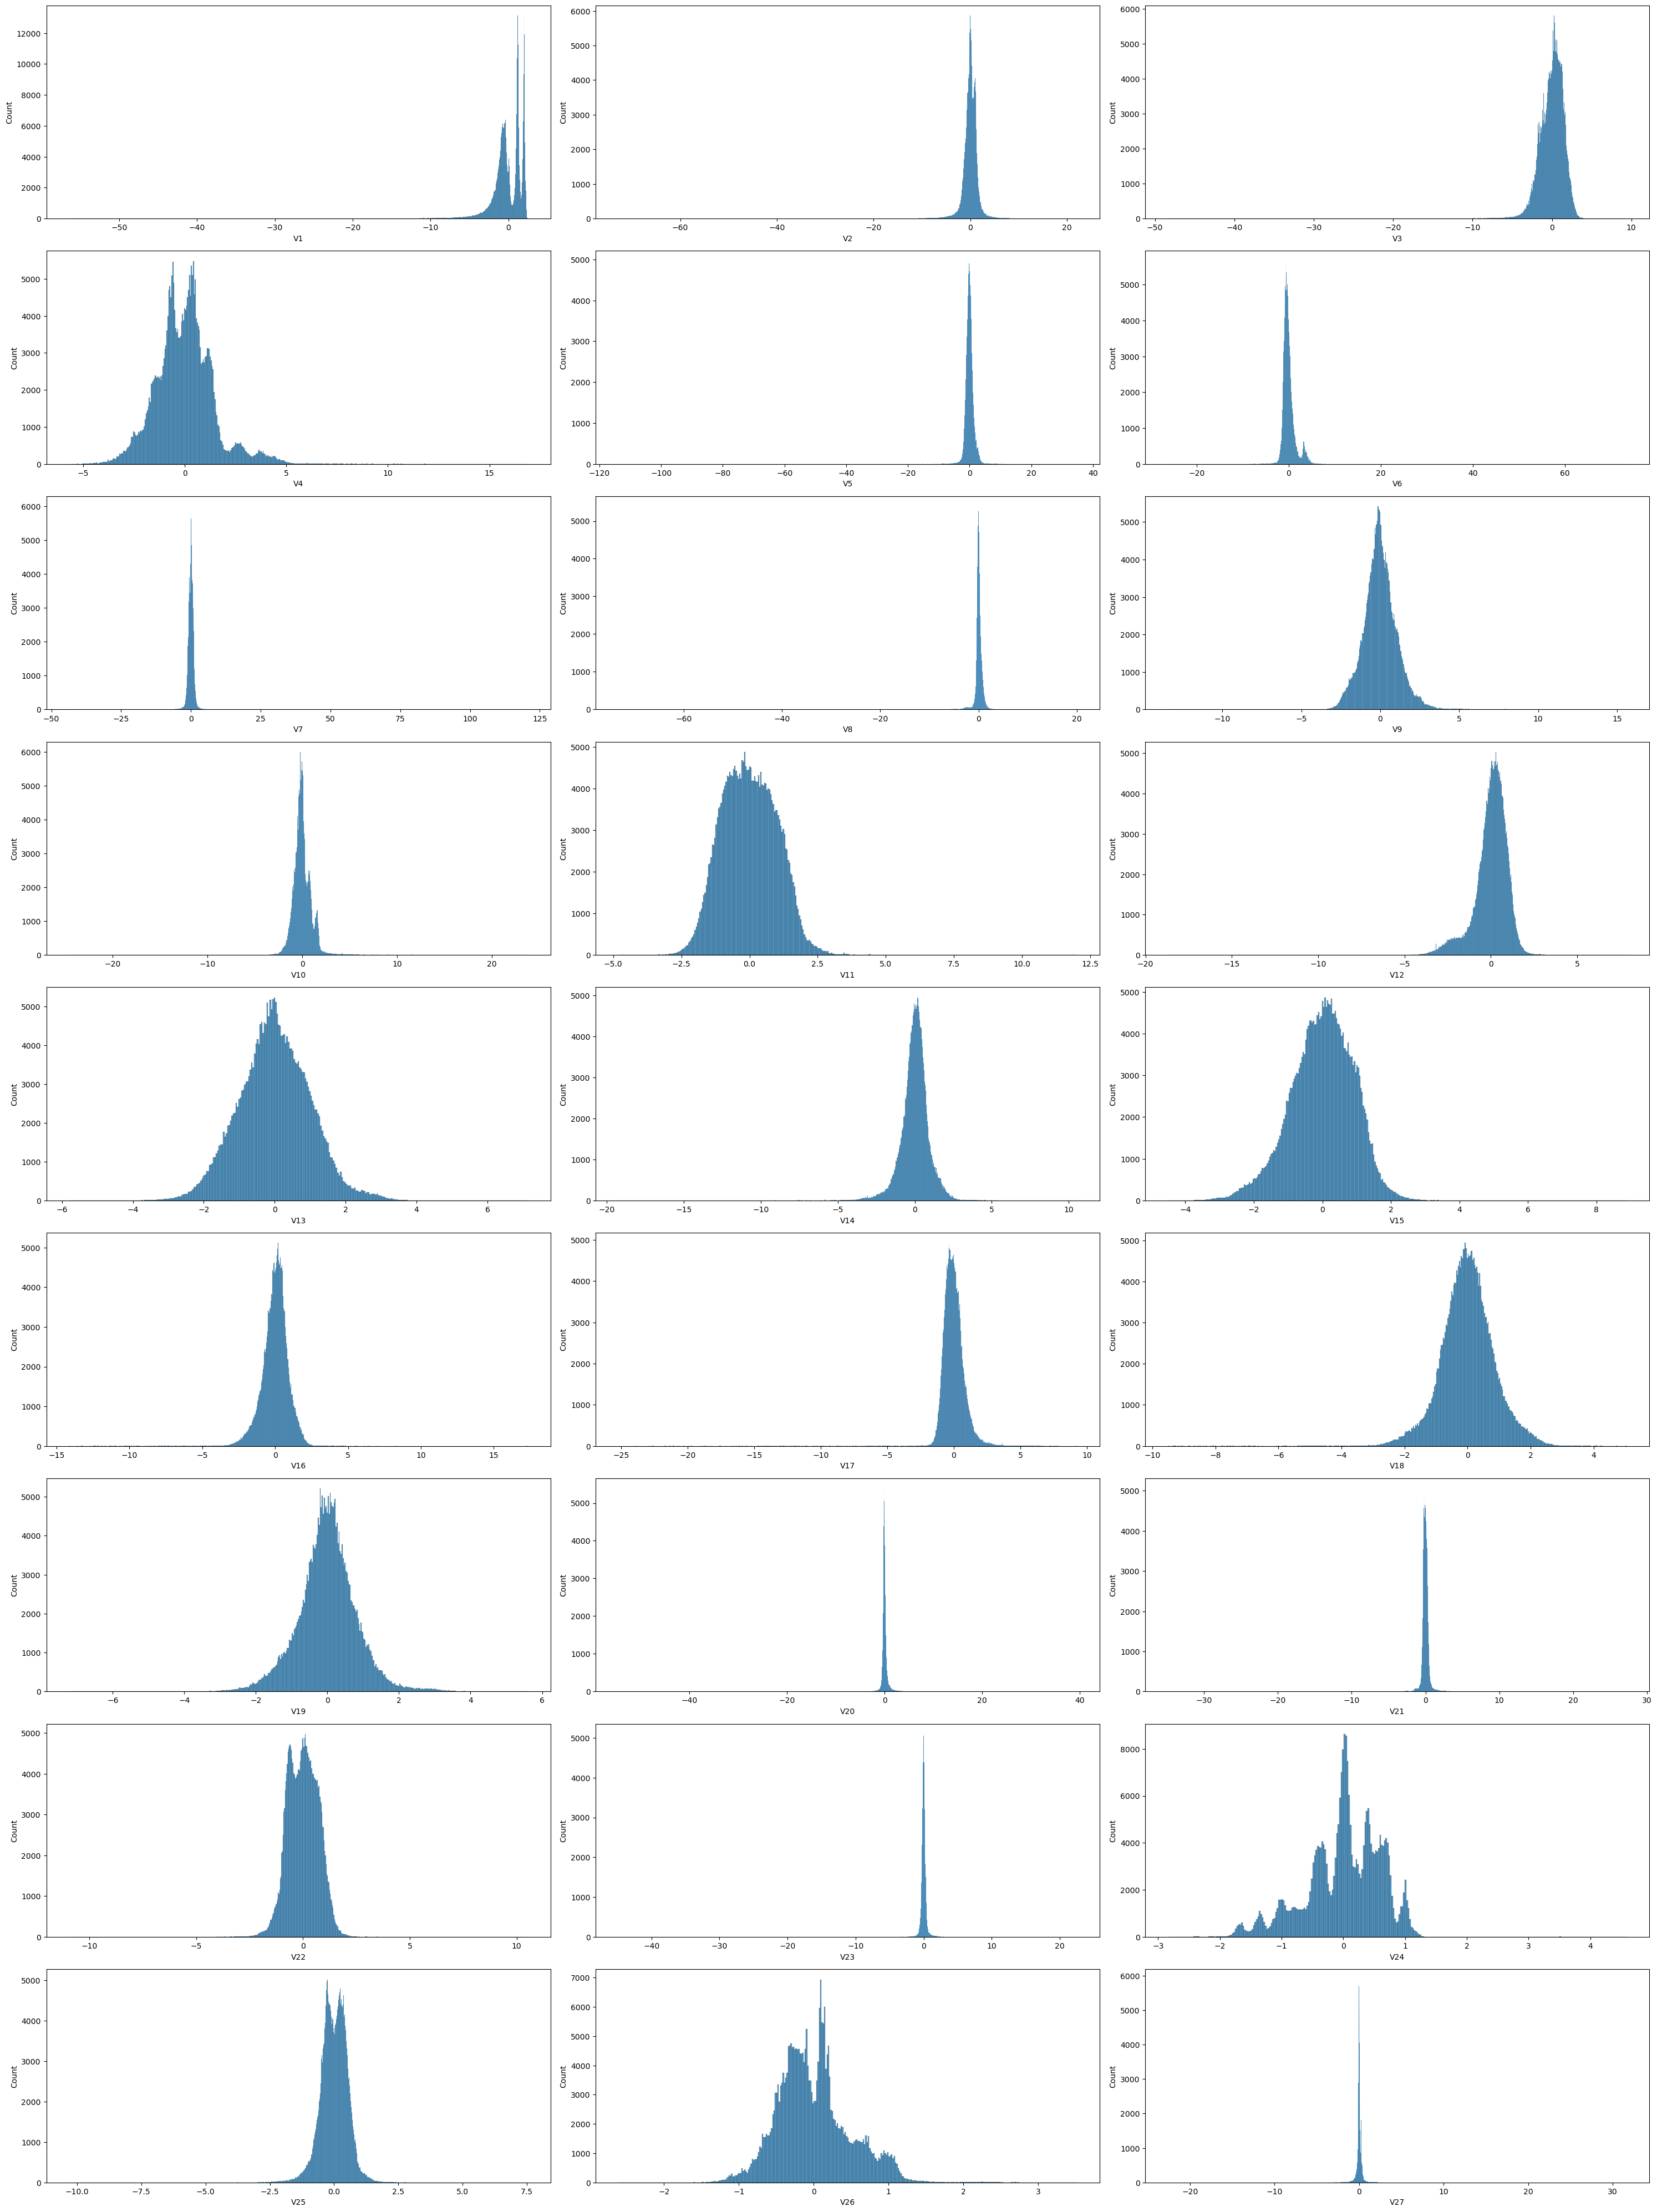

In [25]:
fig, axis = plt.subplots(9, 3, figsize = (30, 40))
ax = axis.flatten()
for i, column in enumerate(df.columns[1 : 28]):
    sns.histplot(data = df, x = df[column],ax = ax[i])

plt.tight_layout()
plt.show()

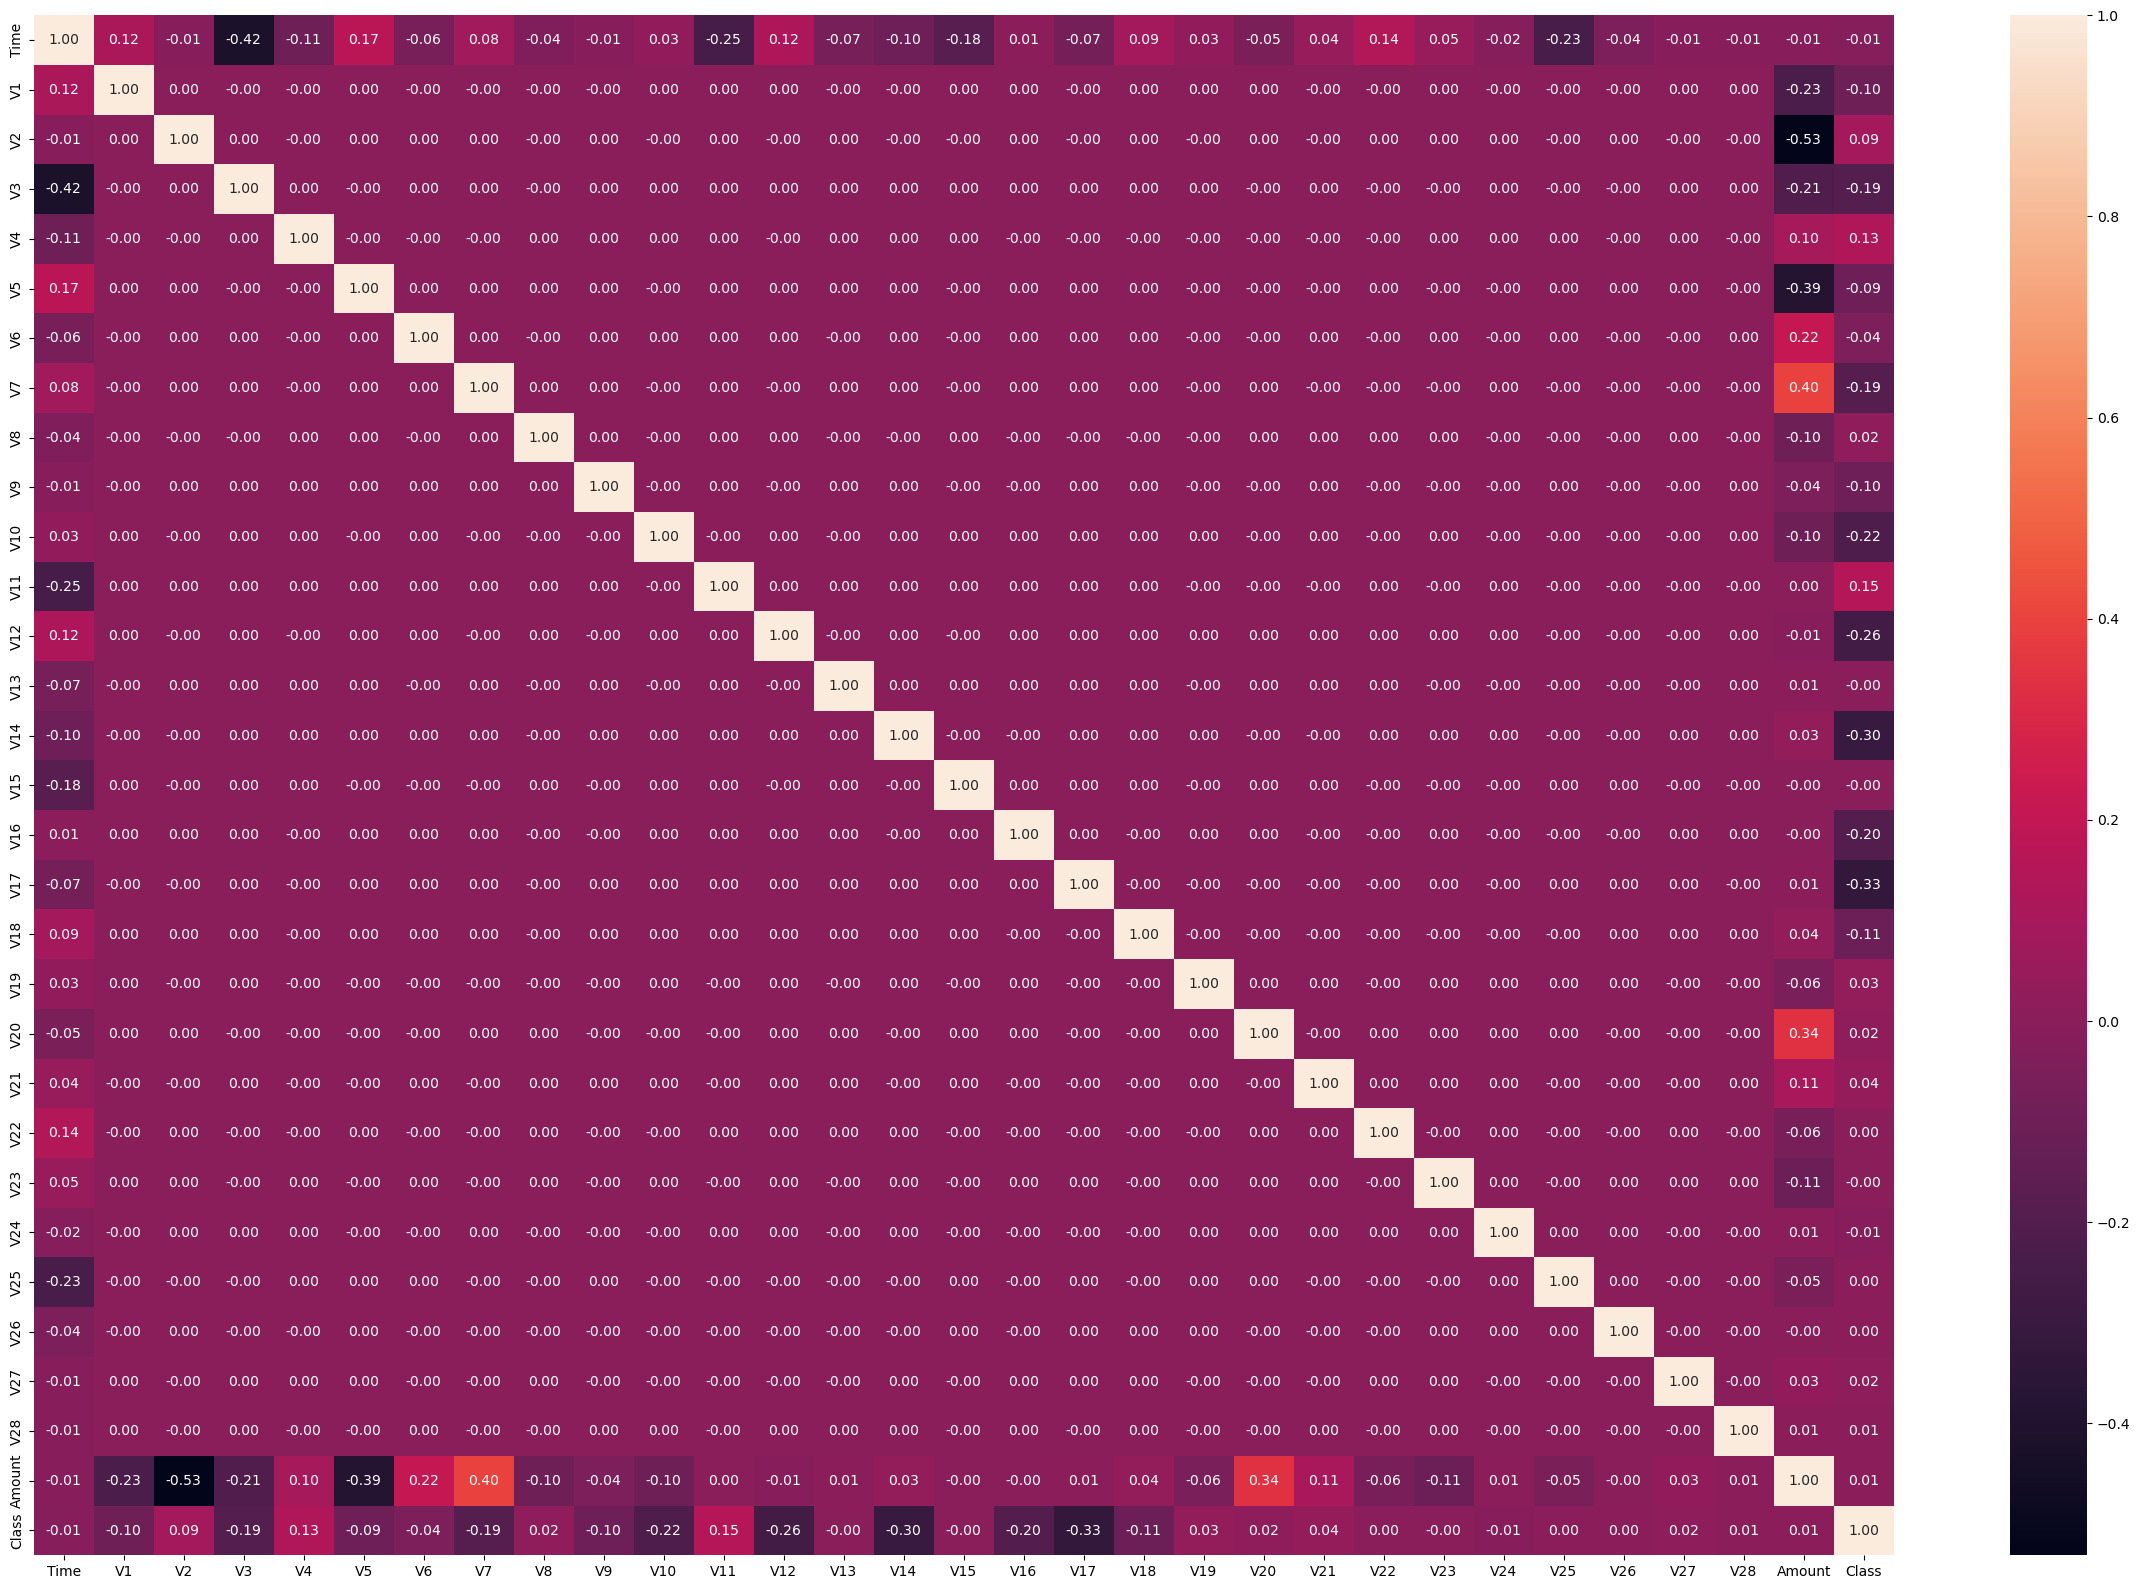

In [27]:
plt.figure(figsize = (30, 20))
sns.heatmap(df.corr(), cbar = "coolwarm", annot = True, fmt = "0.2f")

for corr, column in zip(df.corr().iloc[30], df.columns):
    if abs(corr) < 0.13:
        df.drop(columns = column , inplace = True)

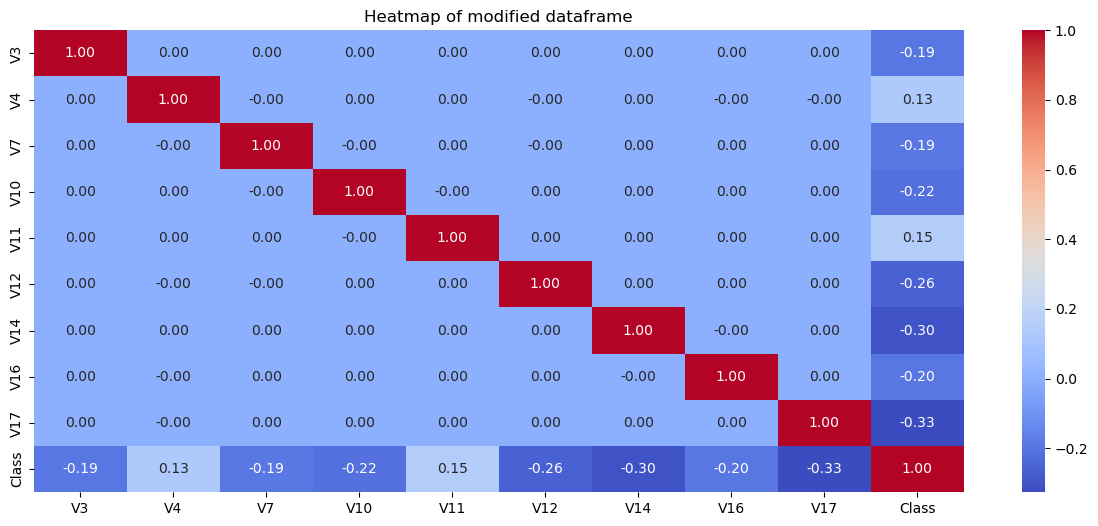

In [29]:
plt.figure(figsize = (15, 6))
plt.title("Heatmap of modified dataframe")
sns.heatmap(df.corr(), cmap = "coolwarm", fmt = "0.2f", annot = True)
plt.show()

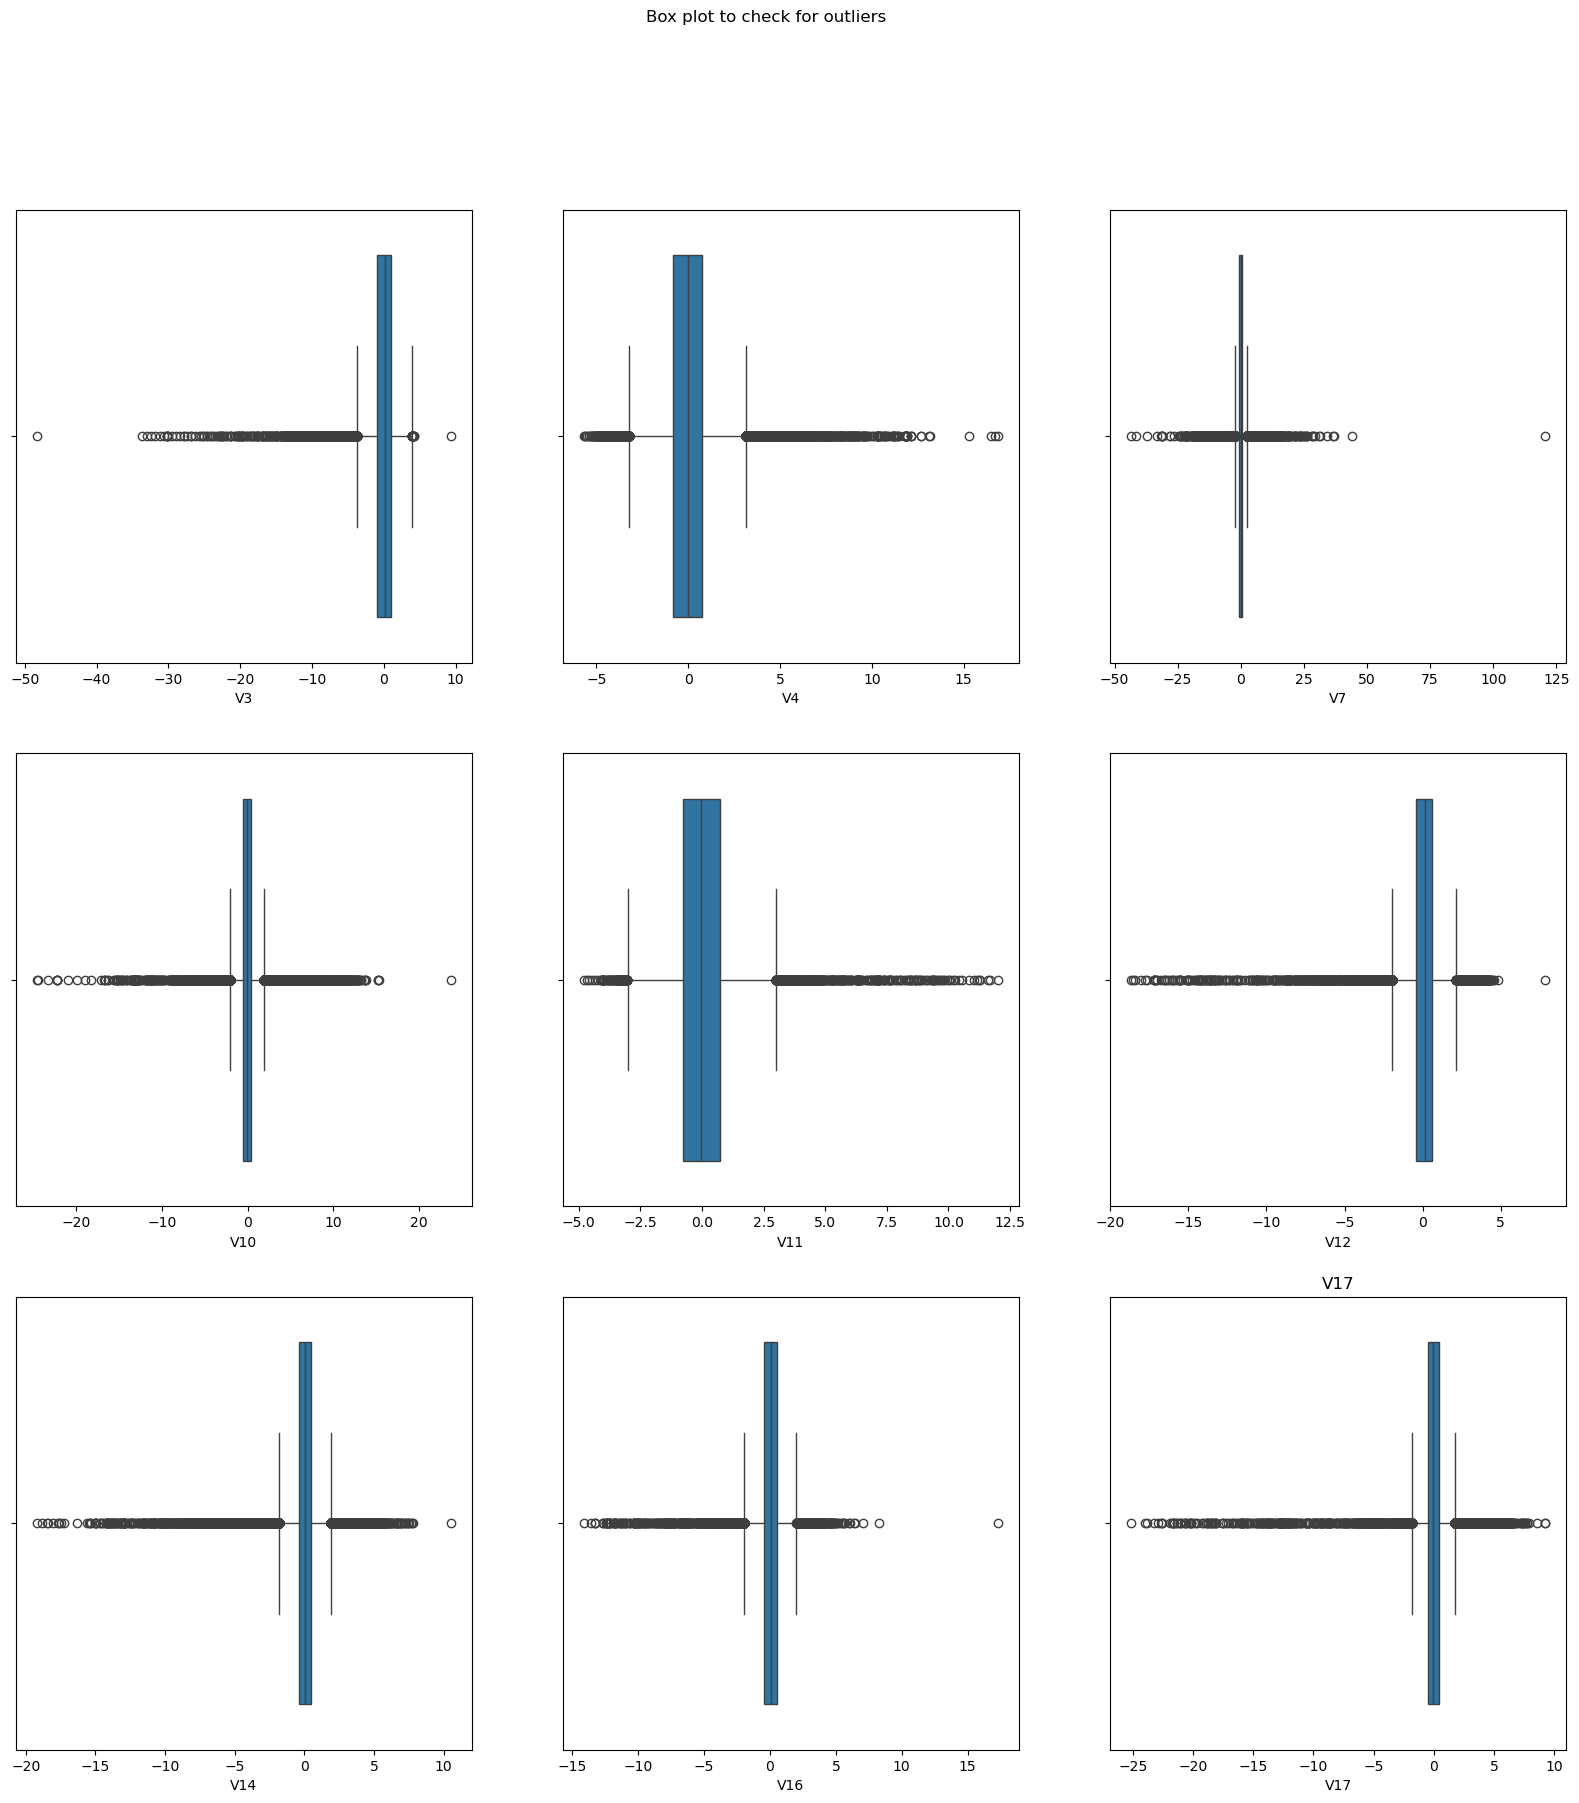

In [31]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))
ax = ax.flatten()
plt.suptitle("Box plot to check for outliers")
for i, column in enumerate(df.columns):
    if i == 9:
        continue
    sns.boxplot(data = df, x = column, ax = ax[i])
    plt.title(column)

In [33]:
X = df.drop(columns = ["Class"])
y = df["Class"]

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(f"Shape of X_train is {X_train.shape}, shape of X_test is {X_test.shape}, shape of y_train is {y_train.shape}, shape of y_test is {y_test.shape}")

Shape of X_train is (227845, 9), shape of X_test is (56962, 9), shape of y_train is (227845,), shape of y_test is (56962,)


In [39]:
rus = RandomUnderSampler(random_state = 7)
X_res, y_res = rus.fit_resample(X_train, y_train)

print(f"Shape of X_res is {X_res.shape}, shape of y_res is {y_res.shape}")
print(f"Distribution of y_res is {Counter(y_res)}")

Shape of X_res is (788, 9), shape of y_res is (788,)
Distribution of y_res is Counter({0: 394, 1: 394})


In [41]:
models = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "LabelPropagation": LabelPropagation(),
    "LabelSpreading": LabelSpreading(),
    "LGBMClassifier": LGBMClassifier(),
    "LinearSVC": LinearSVC(),
    "CalibratedClassifierCV": CalibratedClassifierCV(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SGDClassifier": SGDClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Perceptron": Perceptron(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "SVC": SVC(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "NuSVC": NuSVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RidgeClassifier": RidgeClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "NearestCentroid": NearestCentroid(),
    "RidgeClassifierCV": RidgeClassifierCV(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "DummyClassifier": DummyClassifier()
}

results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score Weighted": [],
    "F1 Score Macro": [],
    "Precision_weighted": [],
    "Recall_weighted": [],
    "Precision_macro_avg": [],
    "Recall_macro_avg": []
    
}


for model_name, model in models.items():

    model.fit(X_res, y_res)
    
    y_pred = model.predict(X_test)
    
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["F1 Score Weighted"].append(f1_score(y_test, y_pred, average='weighted'))
    results["F1 Score Macro"].append(f1_score(y_test, y_pred, average='macro'))
    results["Precision_weighted"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall_weighted"].append(recall_score(y_test, y_pred, average='weighted'))
    results["Precision_macro_avg"].append(precision_score(y_test, y_pred, average='macro'))
    results["Recall_macro_avg"].append(recall_score(y_test, y_pred, average='macro'))


results_df = pd.DataFrame(results)

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [43]:
results_df

Model  Accuracy  F1 Score Weighted  \
0            ExtraTreesClassifier      0.98               0.99   
1                LabelPropagation      0.94               0.97   
2                  LabelSpreading      0.94               0.97   
3                  LGBMClassifier      0.95               0.97   
4                       LinearSVC      0.97               0.98   
5          CalibratedClassifierCV      1.00               1.00   
6          RandomForestClassifier      0.96               0.98   
7                   SGDClassifier      0.89               0.94   
8              LogisticRegression      0.97               0.98   
9            KNeighborsClassifier      0.98               0.99   
10                     Perceptron      0.97               0.98   
11  QuadraticDiscriminantAnalysis      0.96               0.98   
12                            SVC      0.99               0.99   
13                     GaussianNB      0.98               0.99   
14                    BernoulliNB      0.98               0.99   
15                  XGBClassifier      0.95               0.97   
16             AdaBoostClassifier      0.93               0.96   
17              BaggingClassifier      0.95               0.97   
18                          NuSVC      1.00               1.00   
19         DecisionTreeClassifier      0.92               0.96   
20                RidgeClassifier      0.99               1.00   
21     LinearDiscriminantAnalysis      0.99               1.00   
22            ExtraTreeClassifier      0.89               0.94   
23                NearestCentroid      1.00               1.00   
24              RidgeClassifierCV      0.99               1.00   
25    PassiveAggressiveClassifier      0.96               0.98   
26                DummyClassifier      1.00               1.00   

    F1 Score Macro  Precision_weighted  Recall_weighted  Precision_macro_avg  \
0             0.55                1.00             0.98                 0.53   
1             0.51                1.00             0.94                 0.51   
2             0.51                1.00             0.94                 0.51   
3             0.52                1.00             0.95                 0.52   
4             0.55                1.00             0.97                 0.53   
5             0.75                1.00             1.00                 0.68   
6             0.53                1.00             0.96                 0.52   
7             0.49                1.00             0.89                 0.51   
8             0.54                1.00             0.97                 0.52   
9             0.56                1.00             0.98                 0.53   
10            0.54                1.00             0.97                 0.53   
11            0.53                1.00             0.96                 0.52   
12            0.59                1.00             0.99                 0.55   
13            0.57                1.00             0.98                 0.54   
14            0.55                1.00             0.98                 0.53   
15            0.52                1.00             0.95                 0.52   
16            0.51                1.00             0.93                 0.51   
17            0.52                1.00             0.95                 0.52   
18            0.80                1.00             1.00                 0.73   
19            0.50                1.00             0.92                 0.51   
20            0.65                1.00             0.99                 0.59   
21            0.65                1.00             0.99                 0.59   
22            0.48                1.00             0.89                 0.51   
23            0.91                1.00             1.00                 0.91   
24            0.65                1.00             0.99                 0.59   
25            0.53                1.00             0.96                 0.52   
26            0.50 

In [45]:
FinalModel = NearestCentroid()
FinalModel.fit(X_res, y_res)
pred = FinalModel.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



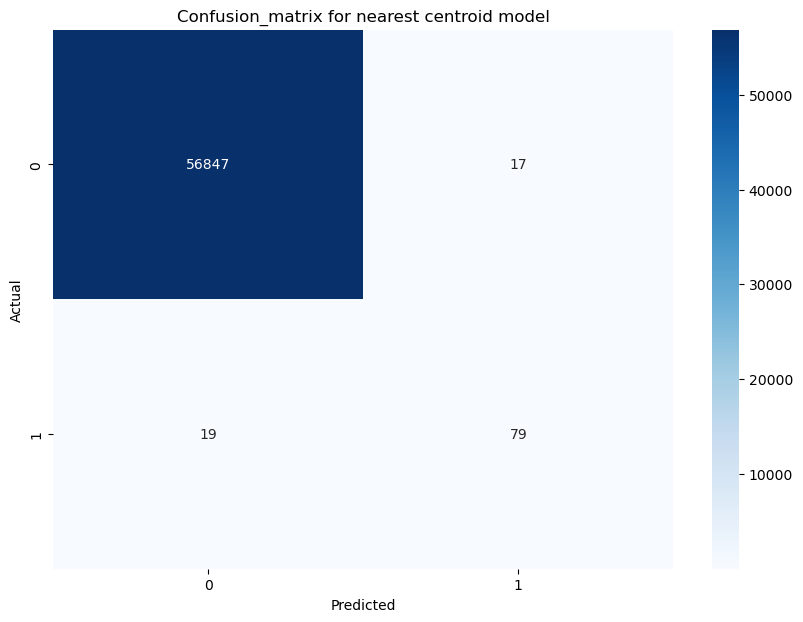

In [51]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize = (10, 7))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion_matrix for nearest centroid model")
plt.show()

In [61]:
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Dropout
from keras import Sequential

Model = Sequential()
Model.add(Dense(9, activation = "relu", input_dim = 9))
Model.add(Dense(16, activation = "relu"))
Model.add(Dropout(0.2))
Model.add(Dense(16,activation = 'relu'))
Model.add(Dropout(0.2))
Model.add(Dense(1,activation = 'sigmoid'))

Model.compile(loss = "binary_crossentropy", weighted_metrics = ['f1_score', 'recall', 'precision'])
history = Model.fit(X_res,y_res,epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.6833 - loss: 0.5890 - precision: 0.6553 - recall: 0.7987
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.6508 - loss: 0.4914 - precision: 0.6913 - recall: 0.8309 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.6750 - loss: 0.4510 - precision: 0.7582 - recall: 0.8390 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.6862 - loss: 0.3986 - precision: 0.8390 - recall: 0.8326 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.6503 - loss: 0.3506 - precision: 0.8624 - recall: 0.8502 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.6984 - loss: 0.3034 - precision: 0.9134 - recall: 0.8615 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.6732 - loss: 0.2692 - precision: 0.9513 - recall: 0.8593 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.6909 - loss: 0.2383 - precision: 0.9574 - recall: 0.8640 
Epoch 9/100
25/25

In [67]:
threshold = 0.9999
pred_n = np.where(Model.predict(X_test) > threshold, 1, 0)
print(classification_report(y_test,pred))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



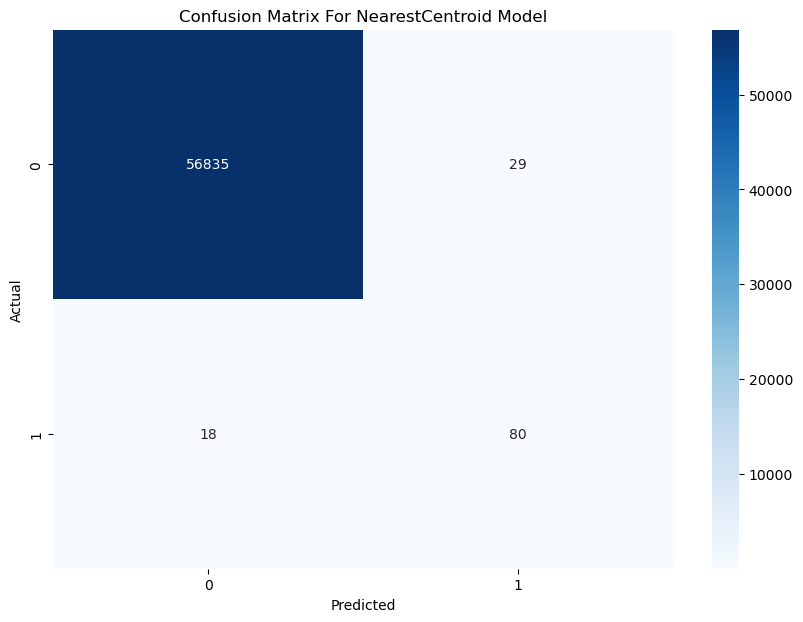

In [69]:
conf_matrix = confusion_matrix(y_test, pred_n)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For NearestCentroid Model')
plt.show()